In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [4]:
Image('djikstra.png')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Consider the example problem we discussed in the theory session (easy to verify!). We will implement from scratch Djikstra  algorithm to find the cost of traversal from a source node to all other nodes in a given connected graph. Note that we are not finding the shortest path itself. But that will follow

In [13]:
class Graph(object):
  def __init__(self, nodes, edges):
    self.nodes = nodes
    self.adjacency = -np.ones([nodes, nodes])
    self.shortest_path_set = [False] * nodes
    #populate the adjacency matrix from edges
    # format of edges = (node1, node2, edge_cost)
    for node1, node2, cost in edges:
      self.adjacency[node1, node2] = cost
	
  # dist = 1D array of all distances to source
  # check if node is not already in the shortest path set
  # output = closest node
  # minimum entry in dist, corresponding entry in 
  # self.shortest_path_set must be False
  def min_cost_index(self, dist):
      return np.argmin(np.array(dist) + 1000*np.array(self.shortest_path_set))
    
  def dijkstra(self, src):
    #initialize distance array
    dist = [1000] * self.nodes
    dist[src] = 0
    
    for _ in range(self.nodes):	
      i = self.min_cost_index(dist)
      # Store min distance vertex in shortest path tree
      self.shortest_path_set[i] = True
      # Update dist value of the neighbors of selected node 
      # Two conditions to check for each neighbor 
      # (a) not in shortest path tree (b) cost is now lowered
      # first get neighbor list from adjacency matrix
      
      all_nodes = self.adjacency[i,:]
      # loop over neighbor list to check for other 2 conditions
      # if satisfied, change dist[j]
      
      for j, edge_cost in enumerate(all_nodes):
        if edge_cost > 0 and not self.shortest_path_set[j]: # valid neighbor
            if dist[i] + edge_cost < dist[j]:
                dist[j] = dist[i] + edge_cost
    return dist

In [14]:
nodes = 7
# (node_A, node_B, edge_cost)
edges = [(0, 1, 8), (0, 2, 5), (0, 3, 2), (1, 4, 2), (2,1,1), (2, 5, 3), \
		      (3, 5, 8), (4, 5, 7), (5, 4, 7), (4, 6, 1), (6, 5, 4) ]

g = Graph(nodes, edges)

for node, dist in enumerate(g.dijkstra(0)):
    print(f"Node {node} is at distance {dist}")

Node 0 is at distance 0
Node 1 is at distance 6.0
Node 2 is at distance 5.0
Node 3 is at distance 2.0
Node 4 is at distance 8.0
Node 5 is at distance 8.0
Node 6 is at distance 9.0


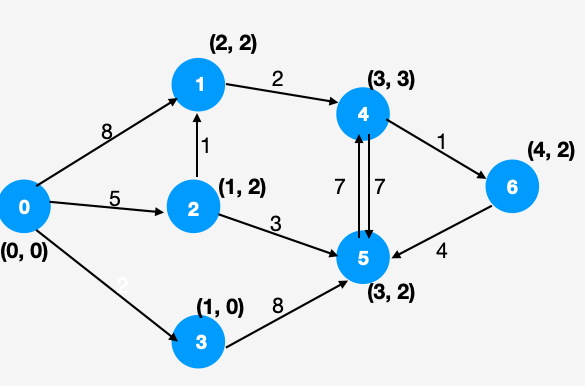

In [ ]:
Image('astar.png')

## A*
Let us now modify the graph to accept the 2D co-ordinates of the node. We will use Euclidean distance as the heuristic

In [ ]:
node_coords = [(0, 0),(2,2),(1,2),(1,0),(3,3),(3,2), (4,2)]

In [16]:
# Function to calculate euclidean distance
# (x1, y1), (x2, y2) given
def euclidean(node1, node2):
    x1, y1 = node1
    x2, y2 = node2
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

class Graph(object):
  def __init__(self, nodes, edges, coords, weight=1.0, heuristic=euclidean):
    self.nodes = nodes
    self.adjacency = np.zeros([nodes, nodes])
    self.shortest_path_set = [False] * nodes
    self.heuristic = heuristic
    self.coords = coords
    self.weight = weight # weight of heuristic
    #populate the adjacency matrix from edges
    # edges = (node1, node2, edge_cost)
    for node1, node2, cost in edges:
      self.adjacency[node1, node2] = cost

  # Input: 1-D distance array to source, destination (x, y)
  # output: next node to be selected
  # remember criteria is source_cost + weight * heuristic_destination
  # node should not be in shortest_path_set
  def min_astar_distance(self, dist, dest_coords):
     heuristic_cost = np.array([self.heuristic(n, dest_coords) for n in self.coords])
     src_cost = np.array(dist)
     costs = src_cost + self.weight*heuristic_cost + 1000 *np.array(self.shortest_path_set)
     return np.argmin(costs)

  def astar(self, src, dest):
    #initialize distance array
    dist = [1000] * self.nodes
    dist[src] = 0
    #get the destination (x,y)
    dest_coords = self.coords[dest]
    for _ in range(self.nodes):	
      
      i = self.min_astar_distance(dist, dest_coords)
      # Store min distance vertex in shortest path tree
      self.shortest_path_set[i] = True
      
      # Update dist value of the neighbors of selected node 
      # Two conditions to check for each neighbor 
      # (a) not in shortest path tree (b) cost is now lowered
      # first get neighbor list from adjacency matrix
      neighbors = self.adjacency[i,:];

      # loop over neighbor list to check for other 2 conditions
      # if satisfied, change dist[j]
      #for j, nbr_cost in enumerate(neighbors):
      for j, nbr_cost in enumerate(neighbors):
        if nbr_cost > 0 and not self.shortest_path_set[j]: # valid neighbor
            if dist[i] + nbr_cost < dist[j]:
                dist[j] = dist[i] + nbr_cost

    # find heuristic cost from all nodes to destination
    # use list comprehension
    heuristic_cost = np.array([self.heuristic(n, dest_coords) for n in self.coords])
        
    return dist, heuristic_cost

In [17]:
nodes = 7
# (node_A, node_B, edge_cost)
edges = [(0, 1, 8), (0, 2, 5), (0, 3, 2), (1, 4, 2), (2, 5, 3), \
		     (3, 5, 8), (4, 5, 7), (5, 4, 7), (5, 6, 1), (6, 5, 4) ]
node_coords = [(0, 0),(2,2),(1,2),(1,0),(3,3),(3,2),(4,2)]
g = Graph(nodes, edges, node_coords)
cost, heuristic = g.astar(0, 6)
for node, (dist, heur) in enumerate(zip(cost, heuristic)):
    print(f"Node {node} is at distance {dist}")
    print(f"Node {node} heuristic is  {heur}")

Node 0 is at distance 0
Node 0 heuristic is  4.47213595499958
Node 1 is at distance 8.0
Node 1 heuristic is  2.0
Node 2 is at distance 5.0
Node 2 heuristic is  3.0
Node 3 is at distance 2.0
Node 3 heuristic is  3.605551275463989
Node 4 is at distance 10.0
Node 4 heuristic is  1.4142135623730951
Node 5 is at distance 8.0
Node 5 heuristic is  1.0
Node 6 is at distance 9.0
Node 6 heuristic is  0.0


Notice that this is a very simple implementation to get the costs of all nodes to the source node. We can make 2 changes 

1. We did not get the predecessors of each node. 
Predecessors list is what will help us determine the path. Can you change the code to print out the predecessors as well?
2.   In general we have to calculate only the path to the destination (not all nodes) as it is computationally expensive. What do you think should be the convergence criteria? Use it to find the shortest path to Node 5 instead of Node 6

Feel free to experiment with other heuristics like (a) L-1 norm (b) number of edges

